# Traffic Sign Detection

In [74]:
import pandas as pd
import numpy as np
import os
import cv2

In [47]:
path = "myData"
labelFile = "labels.csv"
count = 0
images = []
classNo = []
classList = os.listdir(path)
print(classList, end = '')

['26', '22', '29', '6', '10', '33', '40', '5', '11', '0', '34', '28', '31', '7', '30', '3', '24', '27', '36', '14', '8', '21', '12', '9', '2', '13', '38', '4', '19', '41', '25', '1', '17', '23', '20', '42', '16', '32', '15', '35', '18', '37', '39']

In [48]:
noOfClasses = len(classList)

In [49]:
for x in range(0, noOfClasses):
    listOfPictures = os.listdir(path+'/'+str(count))
    for y in listOfPictures:
        currentImg = cv2.imread(path+'/'+str(count)+'/'+y, 0)
        images.append(currentImg)
        classNo.append(count)
    print(count, end = ' ')
    count += 1
print(" ")
images = np.array(images)
classNo = np.array(classNo)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42  


In [6]:
images = images/255

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, classNo, test_size = 0.2)
# X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size = 0.2)

In [51]:
print(X_train.shape)
print(y_train.shape)
# print(X_validation.shape)
# print(y_validation.shape)
print(X_test.shape)
print(y_test.shape)

(58511, 32, 32)
(58511,)
(14628, 32, 32)
(14628,)


In [52]:
data = pd.read_csv(labelFile, index_col=False)
data.shape

(43, 2)

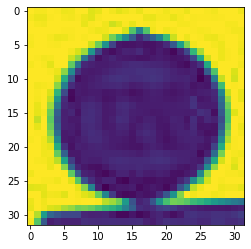

In [53]:
import matplotlib.pyplot as plt
import random
plt.imshow(X_train[0])
plt.show()

In [54]:
print(y_train[0])
print(data['Name'][y_train[0]])

8
Speed limit (120km/h)


In [55]:
X_train = X_train.reshape(-1,32,32,1) #The input to a Conv2D layer must be four-dimensional.
X_test = X_test.reshape(-1,32,32,1)
# X_validation = X_validation.reshape(-1,32,32,1)

In [56]:
print(X_train.shape,X_test.shape)

(58511, 32, 32, 1) (14628, 32, 32, 1)


In [57]:
from keras.utils import np_utils
y_train=np_utils.to_categorical(y_train) #convert array of labeled data(from 0 to nb_classes-1) to one-hot vector.
y_test=np_utils.to_categorical(y_test)
# y_validation=np_utils.to_categorical(y_validation)

In [58]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [59]:
print(y_train.shape,y_test.shape,y_validation.shape)

(58511, 43) (14628, 43) (11703, 43)


In [60]:
from keras.layers import *
from keras.models import Sequential

model=Sequential()
model.add(Conv2D(64,activation='relu',kernel_size=3,input_shape=(32,32,1),padding='same')) #input_shape does not include batch_size
model.add(Conv2D(64,activation='relu',kernel_size=3,padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(16,activation='relu',kernel_size=3,padding='same'))
model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(43))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 64)        640       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 16)        9232      
_________________________________________________________________
flatten_3 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 4096)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 43)               

In [61]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy']) #Sparse Categorical Crossentropy may also be used.

In [62]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=5,batch_size=48,verbose=2)

Train on 58511 samples, validate on 14628 samples
Epoch 1/5
 - 222s - loss: 1.2630 - accuracy: 0.6794 - val_loss: 0.2617 - val_accuracy: 0.9297
Epoch 2/5
 - 258s - loss: 0.2374 - accuracy: 0.9347 - val_loss: 0.1073 - val_accuracy: 0.9758
Epoch 3/5
 - 229s - loss: 0.1260 - accuracy: 0.9644 - val_loss: 0.0674 - val_accuracy: 0.9846
Epoch 4/5
 - 220s - loss: 0.0827 - accuracy: 0.9763 - val_loss: 0.0517 - val_accuracy: 0.9878
Epoch 5/5
 - 221s - loss: 0.0656 - accuracy: 0.9811 - val_loss: 0.0461 - val_accuracy: 0.9878


In [69]:
y_test[image_index]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

33
Turn right ahead


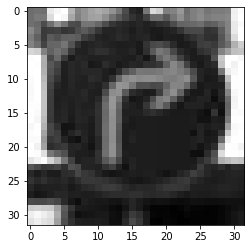

In [73]:
image_index = 402
plt.imshow(X_test[image_index].reshape(32,32),cmap='gray')
pred = model.predict(X_test[image_index].reshape(1,32,32,1))
# print(pred.argmax())
print(data['Name'][pred.argmax()])